In [1]:
#importing libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
plt.style.use('fivethirtyeight')

In [2]:
%store -r wheat_price_history_df
df = wheat_price_history_df
df

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
1,2020-07-31,5.3075,5.3125,0.0175,0.330500,5.3050,5.3050,185655,44131.0,5.2850,5.3525,5.2850
2,2020-07-30,5.2875,5.2950,-0.0325,-0.610042,5.2850,5.2900,186779,44413.0,5.3175,5.3450,5.2500
3,2020-07-29,5.3300,5.3275,0.0925,1.766953,5.3275,5.3300,185642,40067.0,5.2350,5.3325,5.2350
4,2020-07-28,5.2350,5.2350,-0.0425,-0.805306,5.2350,5.2375,186475,48774.0,5.2650,5.2975,5.1925
5,2020-07-27,5.2650,5.2775,-0.1175,-2.177943,5.2650,5.2675,186372,45729.0,5.3875,5.3900,5.2625
...,...,...,...,...,...,...,...,...,...,...,...,...
500,2018-08-07,5.6825,5.6825,-0.0625,-1.087903,5.6775,5.6825,149004,106029.0,5.7525,5.8625,5.6400
501,2018-08-06,5.7375,5.7450,0.1825,3.280899,5.7350,5.7400,159801,75848.0,5.5500,5.7625,5.5150
502,2018-08-03,5.5875,5.5625,-0.0425,-0.758252,5.5850,5.5875,169582,78469.0,5.6325,5.6775,5.5375
503,2018-08-02,5.6175,5.6050,0.0225,0.403045,5.6150,5.6200,179555,150993.0,5.5950,5.9300,5.5900


In [3]:
#Checking dtype of 'Date'
df['Date']

1     2020-07-31
2     2020-07-30
3     2020-07-29
4     2020-07-28
5     2020-07-27
         ...    
500   2018-08-07
501   2018-08-06
502   2018-08-03
503   2018-08-02
504   2018-08-01
Name: Date, Length: 504, dtype: datetime64[ns]

In [4]:
df.index = df.pop('Date')
df.head()

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2020-07-31,5.3075,5.3125,0.0175,0.330500,5.3050,5.3050,185655,44131.0,5.2850,5.3525,5.2850
2020-07-30,5.2875,5.2950,-0.0325,-0.610042,5.2850,5.2900,186779,44413.0,5.3175,5.3450,5.2500
2020-07-29,5.3300,5.3275,0.0925,1.766953,5.3275,5.3300,185642,40067.0,5.2350,5.3325,5.2350
2020-07-28,5.2350,5.2350,-0.0425,-0.805306,5.2350,5.2375,186475,48774.0,5.2650,5.2975,5.1925
2020-07-27,5.2650,5.2775,-0.1175,-2.177943,5.2650,5.2675,186372,45729.0,5.3875,5.3900,5.2625


In [5]:
df = df.sort_values('Date')
df

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2018-08-01,5.5925,5.5825,0.0000,0.000000,5.5875,5.5925,179246,100631.0,5.5525,5.6600,5.5075
2018-08-02,5.6175,5.6050,0.0225,0.403045,5.6150,5.6200,179555,150993.0,5.5950,5.9300,5.5900
2018-08-03,5.5875,5.5625,-0.0425,-0.758252,5.5850,5.5875,169582,78469.0,5.6325,5.6775,5.5375
2018-08-06,5.7375,5.7450,0.1825,3.280899,5.7350,5.7400,159801,75848.0,5.5500,5.7625,5.5150
2018-08-07,5.6825,5.6825,-0.0625,-1.087903,5.6775,5.6825,149004,106029.0,5.7525,5.8625,5.6400
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,5.2650,5.2775,-0.1175,-2.177943,5.2650,5.2675,186372,45729.0,5.3875,5.3900,5.2625
2020-07-28,5.2350,5.2350,-0.0425,-0.805306,5.2350,5.2375,186475,48774.0,5.2650,5.2975,5.1925
2020-07-29,5.3300,5.3275,0.0925,1.766953,5.3275,5.3300,185642,40067.0,5.2350,5.3325,5.2350


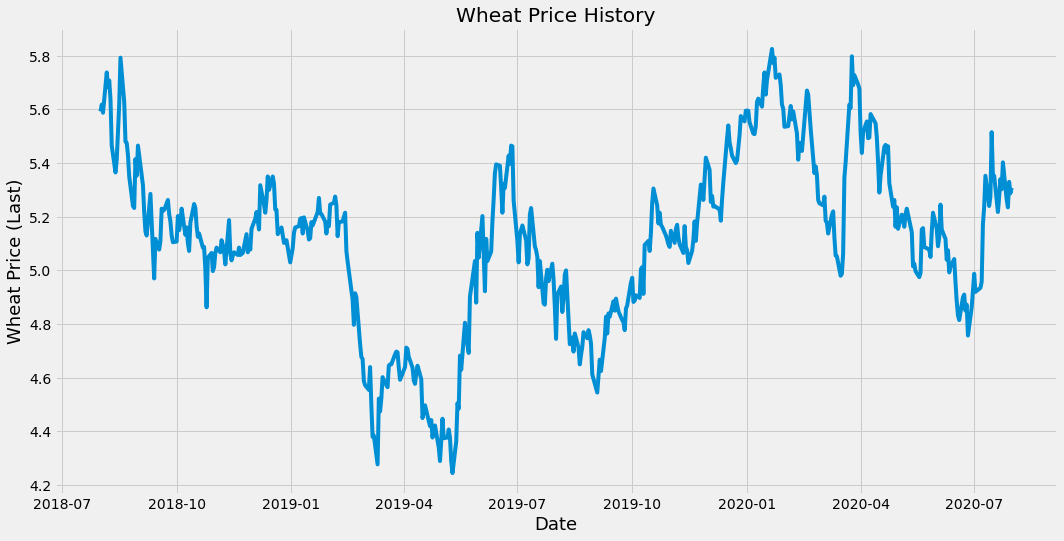

In [6]:
#Visualizing data
plt.figure(figsize = (16,8))
plt.title('Wheat Price History')
plt.plot(df['Last'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Wheat Price (Last)', fontsize = 18)
plt.show()

In [7]:
data = df[['Last', 'Open Interest']]
data.head()

,Last,Open Interest
Date,,
2018-08-01,5.5925,179246
2018-08-02,5.6175,179555
2018-08-03,5.5875,169582
2018-08-06,5.7375,159801
2018-08-07,5.6825,149004


In [8]:
#Convert to numpy array
dataset = data.values
dataset

array([[5.59250e+00, 1.79246e+05],
       [5.61750e+00, 1.79555e+05],
       [5.58750e+00, 1.69582e+05],
       ...,
       [5.33000e+00, 1.85642e+05],
       [5.28750e+00, 1.86779e+05],
       [5.30750e+00, 1.85655e+05]])

In [9]:
training_data_len = math.ceil(len(dataset)*.8)
val_data_len = math.ceil(len(dataset)*.9)

training_data_len, val_data_len

(404, 454)

In [10]:
#def df_to_x_y(df, window_size):
#    df_as_np = df.to_numpy()
#    x = []
#    y = []
#    for i in range(len(df_as_np)-window_size):
#        row = [r for r in df_as_np[i:i+window_size]]
#        x.append(row)
#        label=df_as_np[i+window_size][0]
#        y.append(label)
#    return np.array(x), np.array(y)

In [11]:
#Split data into independant and dependant dataset

x = dataset[:, 0:1] #Features
y = dataset[:, 0] # Last Price

In [12]:
#x, y = df_to_x_y(data, window_size=20)
#x.shape, y.shape

In [13]:
#Scale the data
standard_scaler = StandardScaler()
x_scale = standard_scaler.fit_transform(x)
x_scale

array([[ 1.50658389e+00],
       [ 1.58474487e+00],
       [ 1.49095170e+00],
       [ 1.95991757e+00],
       [ 1.78796342e+00],
       [ 1.86612440e+00],
       [ 1.64727365e+00],
       [ 1.10796290e+00],
       [ 7.95318980e-01],
       [ 9.43824841e-01],
       [ 1.27991705e+00],
       [ 1.59256097e+00],
       [ 2.13187173e+00],
       [ 1.61600926e+00],
       [ 1.15485948e+00],
       [ 1.13922729e+00],
       [ 9.98537526e-01],
       [ 7.48422393e-01],
       [ 4.04514084e-01],
       [ 3.81065790e-01],
       [ 9.51640939e-01],
       [ 7.56238491e-01],
       [ 1.10796290e+00],
       [ 6.46813120e-01],
       [ 3.34169203e-01],
       [ 1.07502363e-01],
       [ 6.06057752e-02],
       [ 5.45203847e-01],
       [ 2.09111636e-01],
       [-1.50428869e-01],
       [-4.39624492e-01],
       [ 2.15252856e-02],
       [-1.03532281e-01],
       [-1.92300822e-03],
       [ 3.73249692e-01],
       [ 3.49801398e-01],
       [ 3.57617496e-01],
       [ 4.74858965e-01],
       [ 3.1

In [14]:
#Split the data into 80% training (testing 10% and svalidation 10%)
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size = 0.5, random_state=42)

In [15]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape 

((403, 1), (50, 1), (51, 1), (403,), (50,), (51,))

In [16]:
#Standardize the data

#Make mean and std variables
#price_training_mean = np.mean(x_train[:, :, 0])
#price_training_std = np.std(x_train[:, :, 0])

#Make preprocessing function
#def preprocess(x):
#    x[:, :, 0] = (x[:, :, 0]-price_training_mean)/price_training_std
#    return x

In [17]:
#Reshape the data
x_train, x_val = np.reshape(x_train, (x_train.shape[0], 1, 1)), np.reshape(x_val, (x_val.shape[0], 1, 1))
x_train.shape, x_val.shape

((403, 1, 1), (50, 1, 1))

In [18]:
#Preprocvess all data
#preprocess(x_train)
#preprocess(x_val)
#preprocess(x_test)

In [32]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='relu'))

In [33]:
history = model.compile(optimizer = 'adam', loss = 'mse', metrics = [RootMeanSquaredError()])

In [34]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 45, epochs = 10, shuffle = True)

Epoch 1/10
9/9 [==============================] - 6s 143ms/step - loss: 25.7854 - root_mean_squared_error: 5.0779 - val_loss: 25.6686 - val_root_mean_squared_error: 5.0664
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 24.9816 - root_mean_squared_error: 4.9982 - val_loss: 24.6994 - val_root_mean_squared_error: 4.9699
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 23.8144 - root_mean_squared_error: 4.8800 - val_loss: 23.2153 - val_root_mean_squared_error: 4.8182
Epoch 4/10
9/9 [==============================] - 0s 12ms/step - loss: 22.0055 - root_mean_squared_error: 4.6910 - val_loss: 20.8534 - val_root_mean_squared_error: 4.5666
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 19.1292 - root_mean_squared_error: 4.3737 - val_loss: 17.1792 - val_root_mean_squared_error: 4.1448
Epoch 6/10
9/9 [==============================] - 0s 14ms/step - loss: 14.8350 - root_mean_squared_error: 3.8516 - val_loss: 12.0554 - val_root_

In [35]:
#get the model's predicted values
predictions = model.predict(x_test)
predictions = standard_scaler.inverse_transform(predictions)
predictions

2/2 [==============================] - 2s 5ms/step


array([[6.8936057],
       [6.854125 ],
       [6.922836 ],
       [6.8785033],
       [6.869548 ],
       [6.8780994],
       [6.8625183],
       [6.906354 ],
       [6.928687 ],
       [6.792884 ],
       [6.7508917],
       [6.7952385],
       [6.929776 ],
       [6.951014 ],
       [6.814197 ],
       [6.9071155],
       [6.919141 ],
       [6.959229 ],
       [6.8259025],
       [6.8920374],
       [6.872414 ],
       [6.8490243],
       [6.876887 ],
       [6.8511558],
       [6.9040613],
       [6.8884907],
       [6.902142 ],
       [6.8833222],
       [6.929776 ],
       [6.895949 ],
       [6.931224 ],
       [6.9257708],
       [6.9213614],
       [6.876887 ],
       [6.9475446],
       [6.8785033],
       [6.87931  ],
       [6.884121 ],
       [6.77322  ],
       [6.895949 ],
       [6.864181 ],
       [6.8865094],
       [6.85073  ],
       [6.8857145],
       [6.9541125],
       [6.8924303],
       [6.8904643],
       [6.9588895],
       [6.9009867],
       [6.8853164],


C:\Users\tusha\AppData\Local\Temp\ipykernel_20932\1349219233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_and_test['Predictions'] = predictions


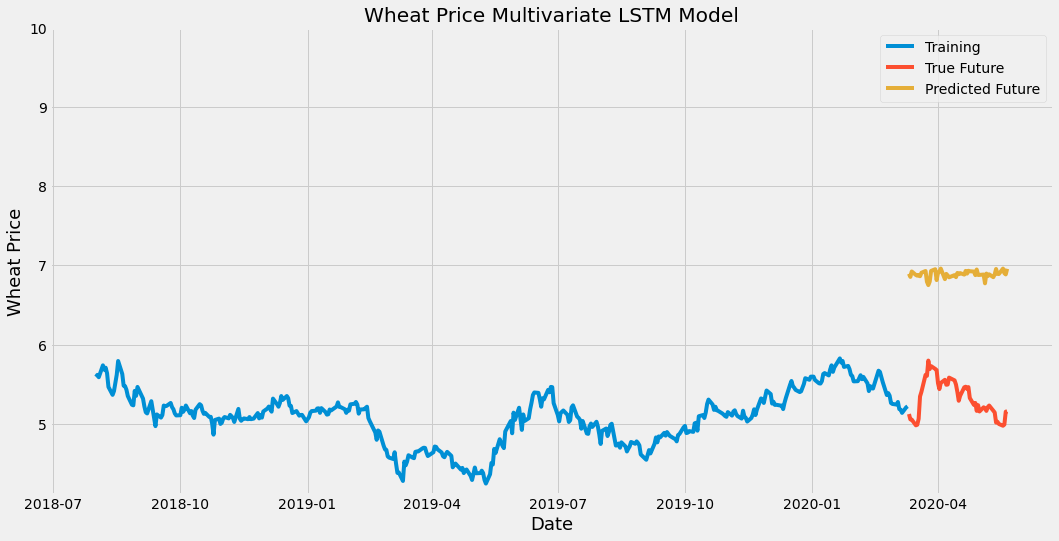

In [41]:
#Create dataframes
train = data[:training_data_len]
valid_and_test = data[training_data_len:val_data_len + 1]
valid_and_test['Predictions'] = predictions

#test = pd.DataFrame(data = {'Predictions': predictions})

#Visualise
plt.figure(figsize=(16,8))
plt.title('Wheat Price Multivariate LSTM Model')
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Wheat Price', fontsize = 18)
plt.plot(train['Last'])
plt.plot(valid_and_test[['Last', 'Predictions']])
plt.ylim(top = 10)
plt.legend(['Training', 'True Future', 'Predicted Future'])
plt.show()

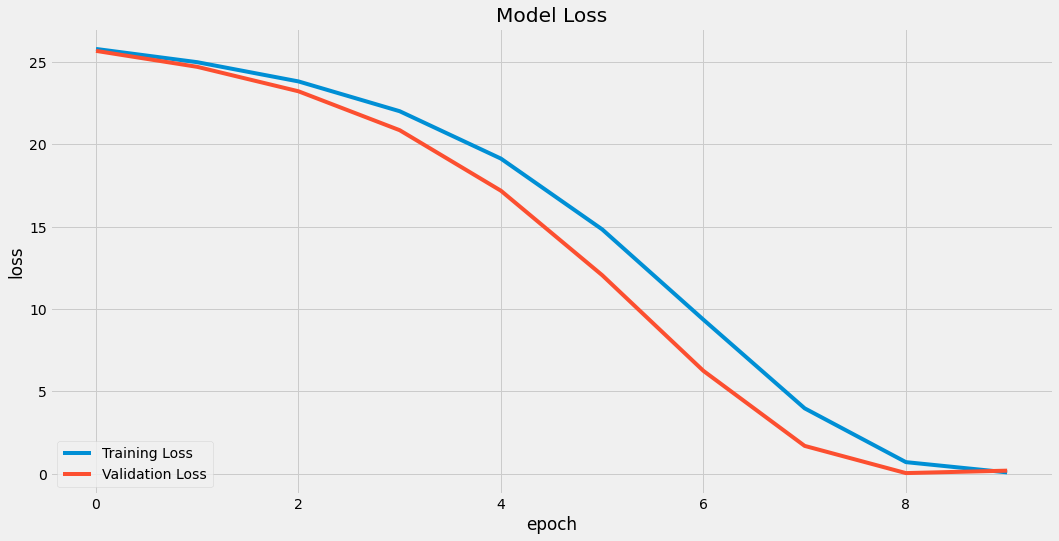

In [37]:
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower left')
plt.show()

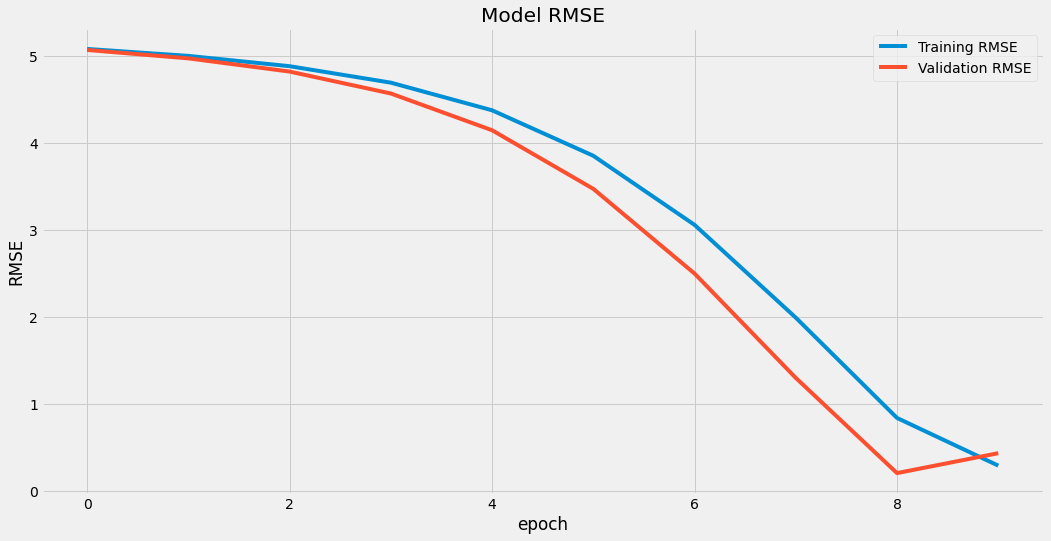

In [38]:
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend(['Training RMSE', 'Validation RMSE'], loc = 'upper right')
plt.show()